In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dotenv
import os
%matplotlib inline

In [4]:
print(dotenv.load_dotenv())
data = pd.read_csv(os.getenv('data_path'))
data.head()

True


,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [5]:
data.columns

Index(['User ID', 'User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing'],
      dtype='object')

## EDA

In [6]:
data.isna().sum().sort_values()

User ID              0
weekday              0
month                0
day                  0
hour                 0
passenger_count      0
pickup_latitude      0
year                 0
pickup_longitude     0
fare_amount          0
key                  0
Traffic Condition    0
Weather              0
Car Condition        0
Driver Name          0
User Name            0
pickup_datetime      0
nyc_dist             5
sol_dist             5
lga_dist             5
dropoff_latitude     5
jfk_dist             5
distance             5
dropoff_longitude    5
ewr_dist             5
bearing              5
dtype: int64

In [7]:
data.drop(['User ID','key','pickup_datetime'],axis= 1, inplace= True) # features already extracted from them.
data.columns

Index(['User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'fare_amount', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'hour', 'day', 'month', 'weekday', 'year',
       'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist', 'distance',
       'bearing'],
      dtype='object')

In [8]:
print(data['Car Condition'].unique())

['Very Good' 'Excellent' 'Bad' 'Good']


In [9]:
condition_map = {
    'Excellent': 3,
    'Very Good': 2,
    'Good': 1,
    'Bad': 0
}
data['Car_Condition_coded'] = data['Car Condition'].map(condition_map)
data['Car_Condition_coded']

0         2
1         3
2         0
3         2
4         0
         ..
499995    0
499996    2
499997    0
499998    1
499999    2
Name: Car_Condition_coded, Length: 500000, dtype: int64

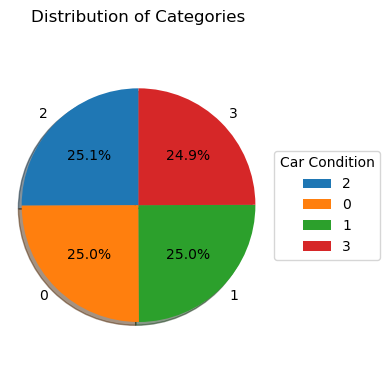

In [10]:
car_value_counts = data['Car_Condition_coded'].value_counts()

# Create a pie chart
plt.figure(figsize=(4,4))
plt.pie(car_value_counts.values, labels=car_value_counts.index, autopct='%1.1f%%', startangle=90,shadow=True)
plt.title('Distribution of Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add a legend
plt.legend(title="Car Condition", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

<Axes: xlabel='fare_amount', ylabel='Weather'>

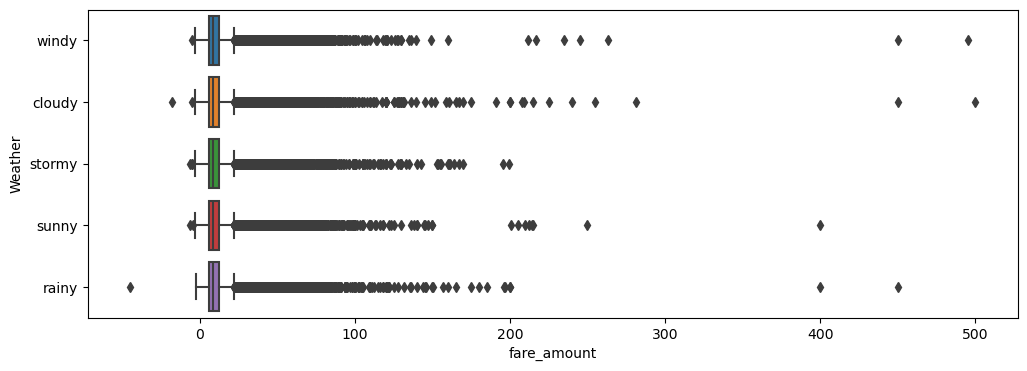

In [11]:
plt.figure(figsize=(12,4))
sns.boxplot(x='fare_amount', data= data, y='Weather')

In [12]:
def set_ticks_(axs, i):
    """
    Set the ticks for the plot.
    """
    yticks = axs[i].get_yticks()
    scaled_yticks = sqrt_scale(yticks)
    axs[i].set_yticks(yticks)
    axs[i].set_yticklabels([f'{val:.1f}' for val in scaled_yticks])

In [13]:
def drop_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.05) # modified this because most of the data is only from 0 to 20 in fare amount
    Q3 = df[column].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)][column]


In [14]:
def sqrt_scale(y):
    return np.sqrt(y)

In [15]:
def set_title_(axes, i, column):
    axes[i].set_title(column)

d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

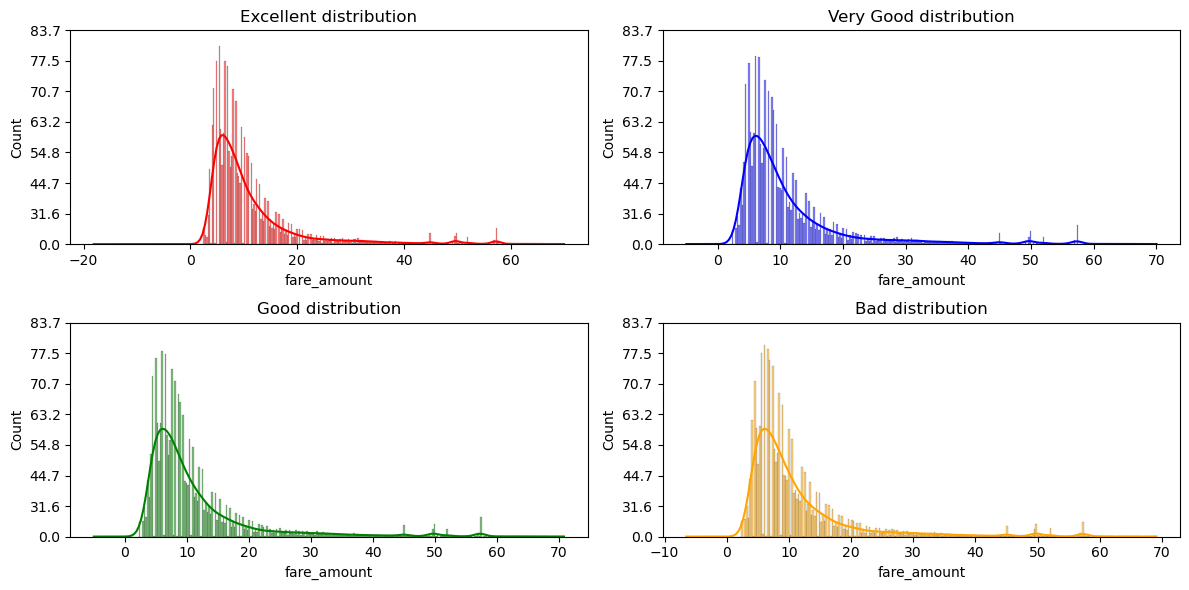

In [16]:
fig, ax = plt.subplots(nrows= 2, ncols= 2, figsize=(12, 6))
ax = ax.flatten()
colors =['red','blue','green','orange']
titles = ['Excellent distribution', 'Very Good distribution', 'Good distribution', 'Bad distribution']

for i, title in enumerate(titles):
    sns.histplot(drop_outliers_iqr(data[data['Car_Condition_coded'] == i],'fare_amount'),ax= ax[i],kde= True,color= colors[i])
    set_ticks_(i=i, axs= ax)
    set_title_(i=i, axes= ax, column= title)

plt.tight_layout()
plt.show()

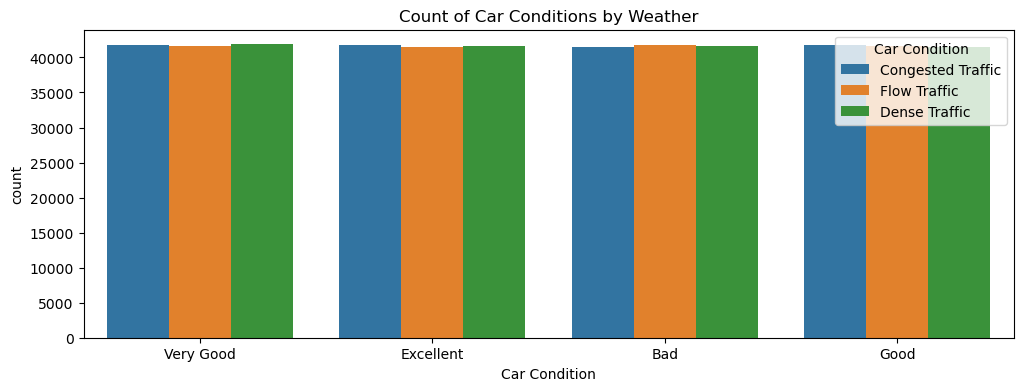

In [17]:
plt.figure(figsize=(12,4))
sns.countplot(
    data= data,
    x= 'Car Condition',
    hue='Traffic Condition'
)

plt.title('Count of Car Conditions by Weather')
plt.legend(title='Car Condition', loc='upper right')


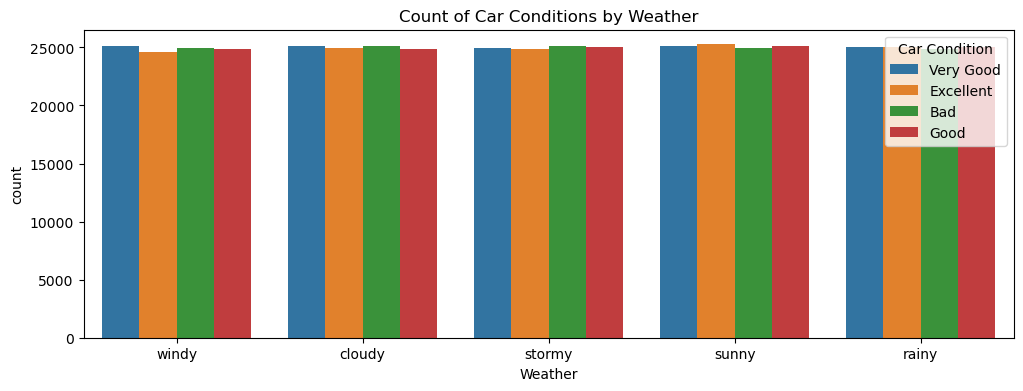

In [18]:
plt.figure(figsize=(12,4))
sns.countplot(
    data= data,
    x= 'Weather',
    hue='Car Condition'
)

plt.title('Count of Car Conditions by Weather')
plt.legend(title='Car Condition', loc='upper right')


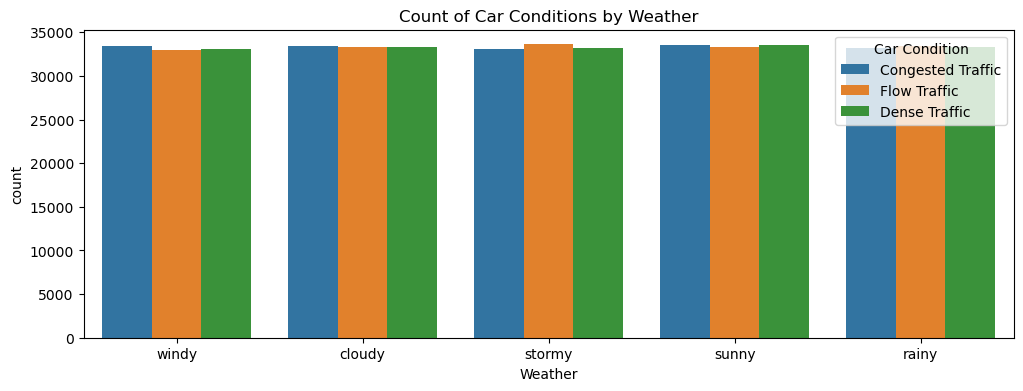

In [19]:
plt.figure(figsize=(12,4))
sns.countplot(
    data= data,
    x= 'Weather',
    hue='Traffic Condition'
)

plt.title('Count of Car Conditions by Weather')
plt.legend(title='Car Condition', loc='upper right')


d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

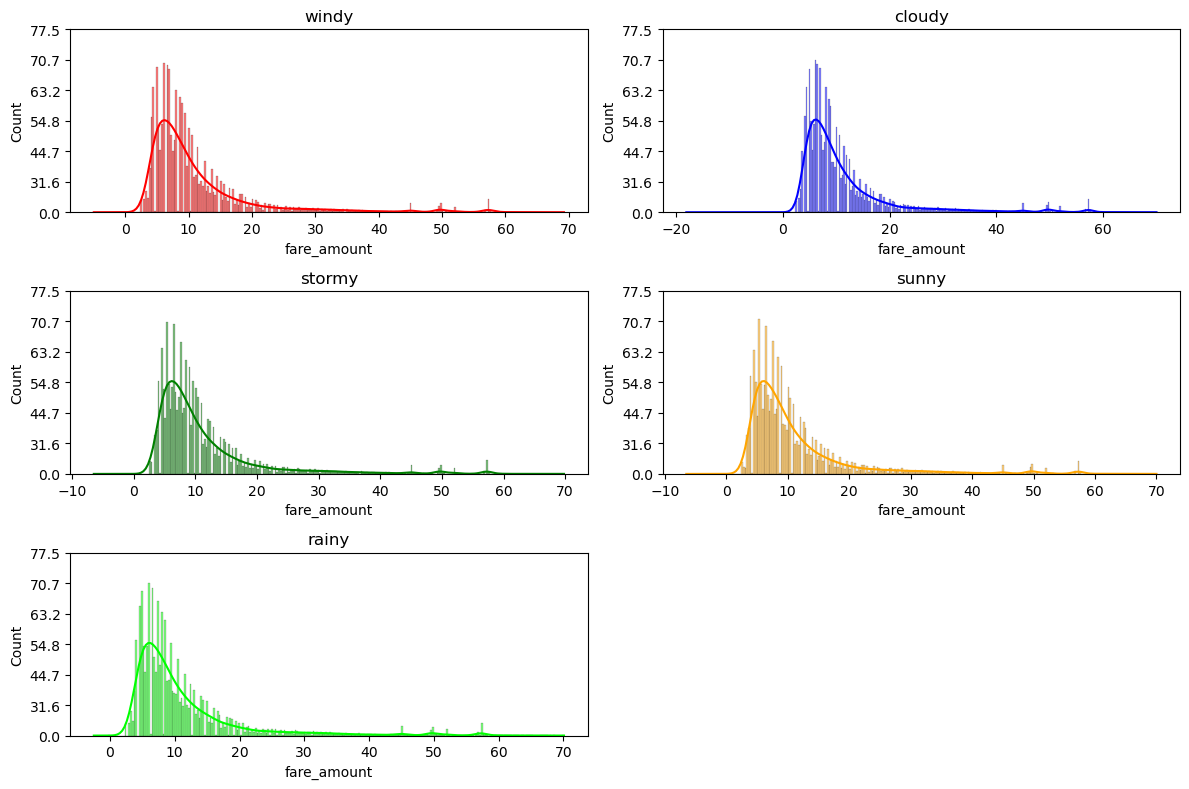

In [20]:
fig, axs = plt.subplots(nrows= 3, ncols= 2, figsize=(12, 8))
axs = axs.flatten()
colors = ['red','blue','green','orange','lime']
weather_cond = data['Weather'].unique()
for i, ax in enumerate(axs):
    if i < 5:
        sns.histplot(drop_outliers_iqr(data[data['Weather'] == weather_cond[i]],'fare_amount'),ax= axs[i],kde= True,color= colors[i])
        set_ticks_(i=i, axs= axs)
        set_title_(i=i, axes= axs, column= weather_cond[i])
    else:
        ax.axis('off')  # Turn off the unused subplot
    
plt.tight_layout()
plt.show()

right skewed -> take the sqrt

d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


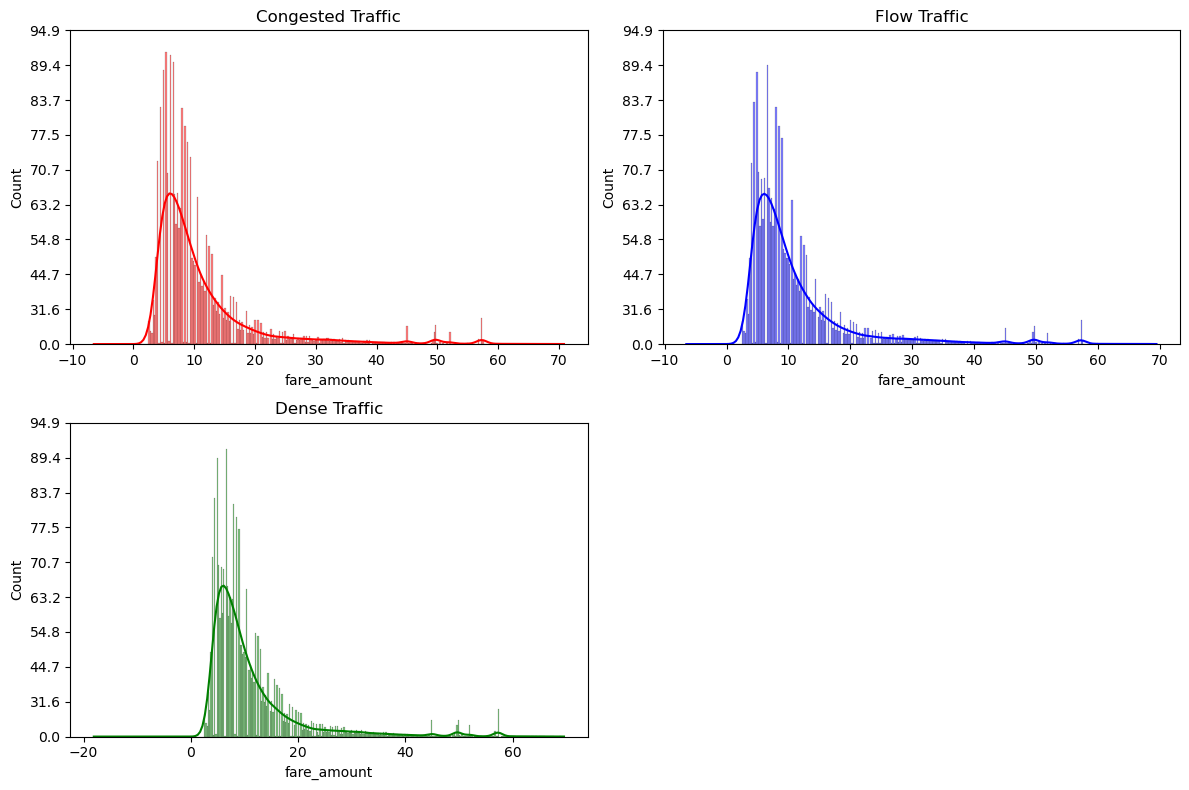

In [21]:
fig, axs = plt.subplots(nrows= 2, ncols= 2, figsize=(12, 8))
axs = axs.flatten()
colors = ['red','blue','green']
traffic_cond = data['Traffic Condition'].unique()
for i, ax in enumerate(axs):
    if i < 3:
        sns.histplot(drop_outliers_iqr(data[data['Traffic Condition'] == traffic_cond[i]],'fare_amount'),ax= axs[i],kde= True,color= colors[i])
        set_ticks_(i=i, axs= axs)
        set_title_(i=i, axes= axs, column= traffic_cond[i])
    else:
        ax.axis('off')  # Turn off the unused subplot
    
plt.tight_layout()
plt.show()

Dense traffic has more negative values than the rest in dense traffic which indicates cutomer's anger or so.

In [22]:
data.columns

Index(['User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'fare_amount', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'hour', 'day', 'month', 'weekday', 'year',
       'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist', 'distance',
       'bearing', 'Car_Condition_coded'],
      dtype='object')

### Top Drivers

In [23]:
top_drivers = data.groupby('Driver Name').agg(
    {
        'User Name': 'count',
        'fare_amount': 'mean'
    }
).reset_index().rename(columns={'User Name': 'count',
                            'fare_amount': 'mean of rides'}
                       )
top_drivers

,Driver Name,count,mean of rides
0,Aaron Acosta,1,4.900000
1,Aaron Adams,6,9.283333
2,Aaron Aguilar,1,8.500000
3,Aaron Aguirre,1,4.100000
4,Aaron Allen,6,14.216667
...,...,...,...
221695,Zoe Wilkinson,1,5.500000
221696,Zoe Wilson,1,6.000000
221697,Zoe Woodard,1,12.900000
221698,Zoe Wright,1,9.700000


In [52]:
top_drivers_trips = top_drivers.nlargest(10,'count')
top_drivers_fare = top_drivers.nlargest(10,'mean of rides')

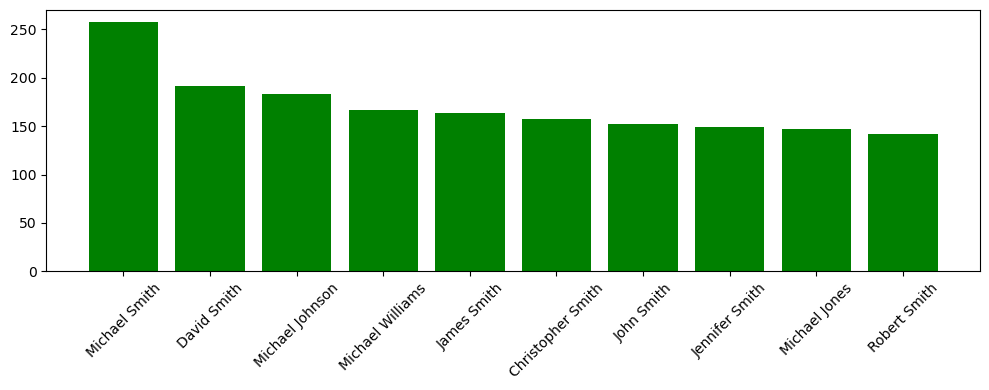

In [53]:
plt.figure(figsize=(10,4))
plt.bar(top_drivers_trips['Driver Name'], top_drivers_trips['count'], color='green')
plt.xticks(rotation= 45)
plt.tight_layout()

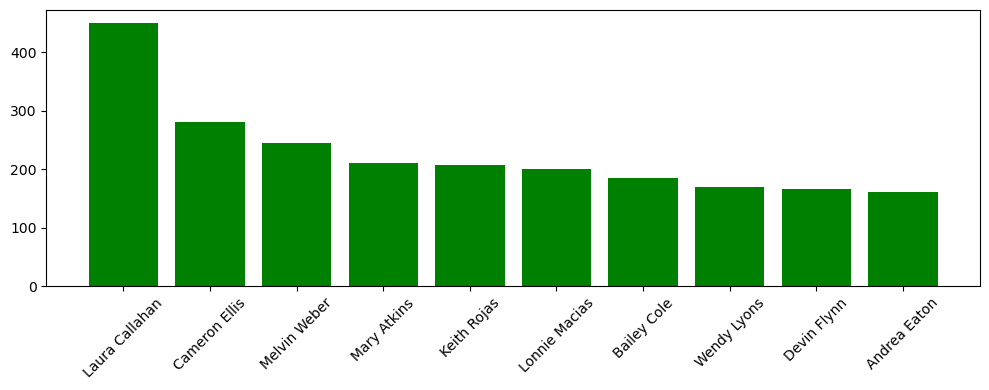

In [54]:
plt.figure(figsize=(10,4))
plt.bar(top_drivers_fare['Driver Name'], top_drivers_fare['mean of rides'], color='green')
plt.xticks(rotation= 45)
plt.tight_layout()

None of top 10 drivers rides are in in top 10 average fare.

In [65]:
top_drivers_fare = top_drivers.sort_values(by= 'mean of rides', ascending= False).reset_index().drop(['index'], axis= 1)
top_drivers_fare

,Driver Name,count,mean of rides
0,Laura Callahan,1,450.00
1,Cameron Ellis,1,281.05
2,Melvin Weber,1,245.41
3,Mary Atkins,1,211.44
4,Keith Rojas,1,208.00
...,...,...,...
221695,Aimee Duran,1,-3.00
221696,Kristin Roberts,4,-3.05
221697,Theresa Hogan,1,-5.00
221698,Scott Watkins,2,-6.20


In [66]:
top_drivers_fare = top_drivers_fare[top_drivers_fare['count'] > 10].reset_index().drop(['index'],axis= 1)
top_drivers_fare = pd.merge(top_drivers_fare,
                                data[['Driver Name', 'distance', 'Car Condition', 'Weather', 'Traffic Condition']],
                                    on= 'Driver Name', how= 'left')
top_drivers_fare

,Driver Name,count,mean of rides,distance,Car Condition,Weather,Traffic Condition
0,Deborah Lopez,11,55.036364,4.144149,Very Good,stormy,Flow Traffic
1,Deborah Lopez,11,55.036364,0.000000,Excellent,cloudy,Dense Traffic
2,Deborah Lopez,11,55.036364,1.428505,Good,sunny,Congested Traffic
3,Deborah Lopez,11,55.036364,1.972308,Very Good,windy,Flow Traffic
4,Deborah Lopez,11,55.036364,1.915948,Good,cloudy,Congested Traffic
...,...,...,...,...,...,...,...
99416,Aaron Torres,11,5.727273,1.396948,Excellent,rainy,Congested Traffic
99417,Aaron Torres,11,5.727273,1.122109,Very Good,sunny,Flow Traffic
99418,Aaron Torres,11,5.727273,2.927611,Bad,rainy,Congested Traffic
99419,Aaron Torres,11,5.727273,0.622238,Excellent,rainy,Dense Traffic


In [72]:
unique_drivers = top_drivers_fare.drop_duplicates(subset=['Driver Name']).head(11)['Driver Name'].tolist()
unique_drivers.remove('Brittany Anderson')

In [73]:
filtered_data = top_drivers_fare[top_drivers_fare['Driver Name'].isin(unique_drivers)]

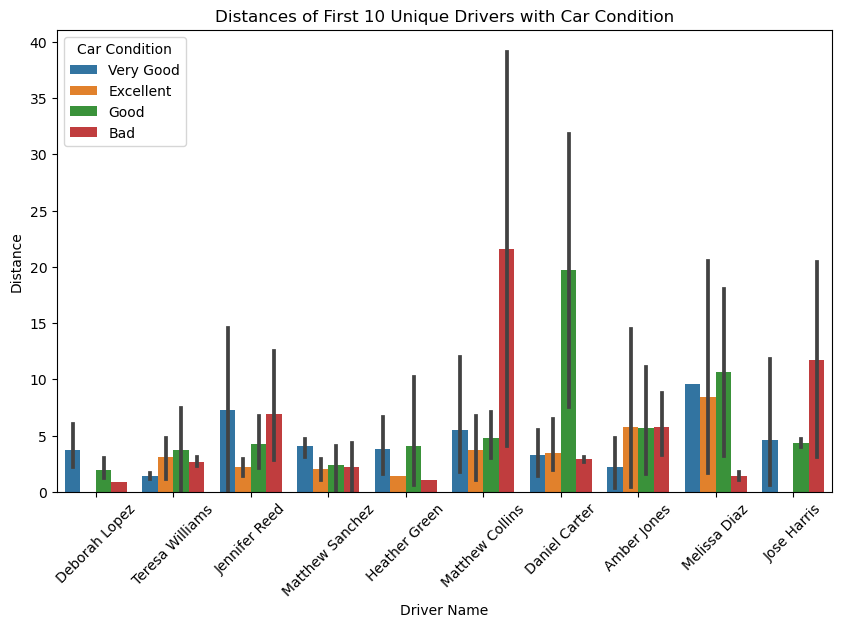

In [74]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Driver Name', y='distance', hue='Car Condition', data=filtered_data)
plt.xlabel('Driver Name')
plt.ylabel('Distance')
plt.title('Distances of First 10 Unique Drivers with Car Condition')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend(title='Car Condition')
plt.show()

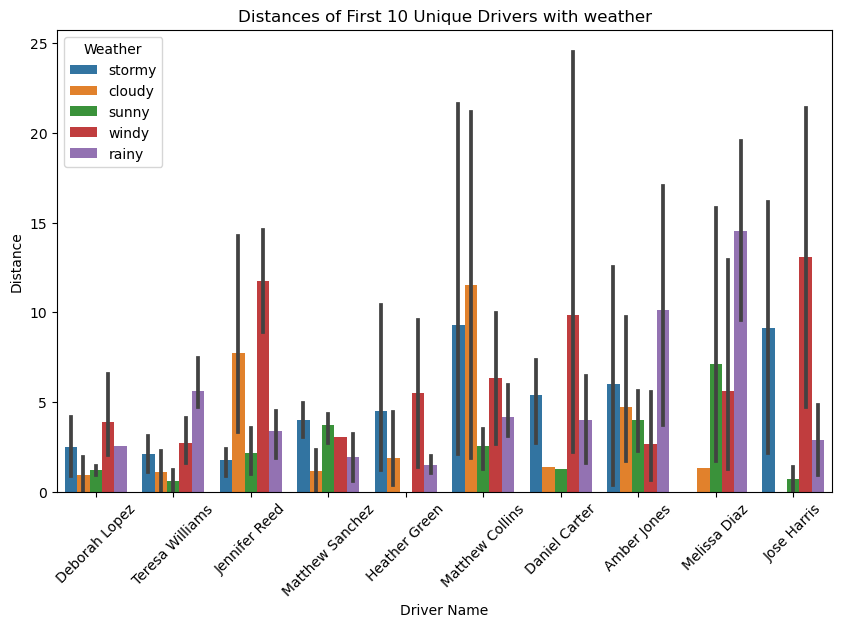

In [75]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Driver Name', y='distance', hue='Weather', data=filtered_data)
plt.xlabel('Driver Name')
plt.ylabel('Distance')
plt.title('Distances of First 10 Unique Drivers with weather')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend(title='Weather')
plt.show()

In [95]:
car_dist = data.groupby('Car Condition').agg({
        'distance' : 'sum'
    }).reset_index()
car_dist['sum'] = car_dist['distance'].apply(np.sqrt)
car_dist.drop(['distance'],axis= 1,inplace= True)
car_dist

,Car Condition,sum
0,Bad,1577.669980
1,Excellent,1549.944939
2,Good,1513.085373
3,Very Good,1597.964667


In [102]:
weather_dist = data.groupby('Weather').agg({
        'distance' : 'sum'
    }).reset_index()
weather_dist['sum'] = weather_dist['distance'].apply(np.sqrt)
weather_dist.drop(['distance'],axis= 1,inplace= True)
weather_dist.sort_values(by= 'sum', ascending= False, inplace= True)
weather_dist

,Weather,sum
3,sunny,1448.561370
0,cloudy,1434.440831
2,stormy,1397.876113
1,rainy,1386.700500
4,windy,1304.355725


<BarContainer object of 5 artists>

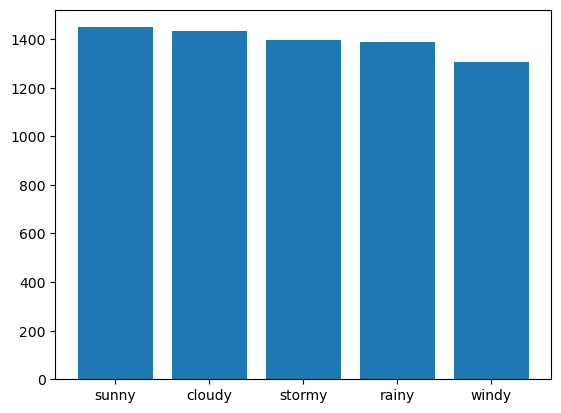

In [103]:
plt.bar(weather_dist['Weather'], weather_dist['sum'])

### Distances.